In [35]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from math import ceil

In [51]:
class EMG3DDataset(torch.utils.data.Dataset):
    def __init__(self, emg_input, vel_labels, batch_size, input_size, output_size, sequence_length):
        self.emg_input = emg_input
        self.vel_labels = vel_labels
        print(f"emg_input.shape: {emg_input.shape}")
        print(f"vel_labels.shape: {vel_labels.shape}")
        print()

        self.input_size = input_size
        self.output_size = output_size

        self.sequence_length = sequence_length
        self.batch_size = batch_size
        self.original_sequence_length = self.emg_input.shape[0]
        self.original_sequence_length_labels = self.vel_labels.shape[0]
        assert(self.emg_input.shape[0] == self.vel_labels.shape[0])
        self.total_samples = self.emg_input.numel()
        self.total_labels = self.vel_labels.numel()

        print(f"batch_size: {self.batch_size}")
        print(f"input_size: {self.input_size}")
        print(f"output_size: {self.output_size}")
        print(f"sequence_length: {self.sequence_length}")
        print(f"total_samples: {self.total_samples}")
        print(f"total_labels: {self.total_labels}")
        print()

        #self.num_sample_batches = self.emg_input.size / self.batch_size / self.sequence_length / self.input_size
        #self.num_label_batches = self.vel_labels.size / self.batch_size / self.sequence_length / self.input_size
        #self.batched_data = self.emg_input.reshape(self.num_sample_batches, self.batch_size, self.sequence_length, self.input_size)
        #self.batched_targets = self.vel_labels.reshape(self.num_label_batches, self.batch_size, self.sequence_length, self.output_size)

        # Calculate the number of batches using math.ceil to round up
        self.num_sample_batches = ceil(self.total_samples / (self.batch_size * self.sequence_length * self.input_size))
        self.num_label_batches = ceil(self.total_labels / (self.batch_size * self.sequence_length * self.output_size))
        
        # Calculate the total size needed after rounding up
        total_size_needed = self.num_sample_batches * self.batch_size * self.sequence_length * self.input_size
        total_label_size_needed = self.num_label_batches * self.batch_size * self.sequence_length * self.output_size
        
        # Pad the data to the total size needed
        self.batched_data = np.pad(self.emg_input.size(), (0, total_size_needed - self.total_samples))
        self.batched_targets = np.pad(self.vel_labels.size(), (0, total_label_size_needed - self.total_labels))
        
        # Reshape data using the calculated number of batches
        self.batched_data = self.batched_data.reshape(self.num_sample_batches, self.batch_size, self.sequence_length, self.input_size)
        self.batched_targets = self.batched_targets.reshape(self.num_label_batches, self.batch_size, self.sequence_length, self.output_size)

    def __len__(self):
        return self.original_sequence_length

    def __getitem__(self, idx):
        return self.batched_data[idx], self.batched_targets[idx]

In [52]:
# Assuming 'your_data' is your original data with shape (64, 10000)
#samples = torch.rand(64, 10000)  # Replace this line with your actual data
#labels = torch.rand(2, 10000)
samples = torch.rand(10000, 64)  # Replace this line with your actual data
labels = torch.rand(10000, 2)

# Set your desired sequence length and batch size
sequence_length = 100
batch_size = 10

# Create an instance of the custom dataset
custom_dataset = EMG3DDataset(samples, labels, batch_size, 64, 2, sequence_length)

# Create DataLoader
your_data_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)

# Example of accessing data through DataLoader
batch_counter = 0
for batch_data, targets in your_data_loader:
    print(f"BATCH COUNTER: {batch_counter}")
    batch_counter+=1
    print("Batch Shape:", batch_data.shape)
    print("Targets Shape:", targets.shape)
    print()

emg_input.shape: torch.Size([10000, 64])
vel_labels.shape: torch.Size([10000, 2])

batch_size: 10
input_size: 64
output_size: 2
sequence_length: 100
total_samples: 640000
total_labels: 20000



ValueError: cannot reshape array of size 2 into shape (10,10,100,64)

In [38]:
self.batch_size * self.sequence_length * self.input_size

NameError: name 'self' is not defined

In [24]:
class EMG3DDataset(torch.utils.data.Dataset):
    def __init__(self, emg_input, vel_labels, batch_size, input_size, output_size):
        self.emg_input = emg_input
        self.vel_labels = vel_labels
        print(f"emg_input.shape: {emg_input.shape}")
        print(f"vel_labels.shape: {vel_labels.shape}")

        self.input_size = input_size
        self.output_size = output_size

        #self.sequence_length = sequence_length
        self.batch_size = batch_size
        self.sequence_length = self.emg_input.shape[0]
        self.sequence_length_labels = self.vel_labels.shape[0]
        assert(self.emg_input.shape[0] == self.vel_labels.shape[0])
        self.total_samples = self.emg_input.size
        self.total_labels = self.vel_labels.size

    def __len__(self):
        return self.sequence_length

    def __getitem__(self, idx):
        #start_idx = idx * self.batch_size * self.sequence_length
        #end_idx = (idx + 1) * self.batch_size * self.sequence_length
        #batch_data = self.data[:, start_idx:end_idx].reshape(self.batch_size, self.sequence_length, -1)
        ## Assuming you have target data, adjust the target retrieval accordingly
        #batch_targets = self.targets[:, start_idx:end_idx].reshape(self.batch_size, self.sequence_length, -1)
        #return batch_data, batch_targets
    
        #start_idx = idx * self.batch_size * self.sequence_length
        #end_idx = (idx + 1) * self.batch_size * self.sequence_length
        start_idx = idx * (self.sequence_length // self.batch_size)
        end_idx = (idx + 1) * (self.sequence_length // self.batch_size)
        # Ensure the end index doesn't exceed the total number of samples
        end_idx = min(end_idx, self.sequence_length)
        # Make the code robust for when there is a remainder on the division
        remaining_samples = (end_idx - start_idx) % self.batch_size
        #print(f"REMAINING SAMPLES: {remaining_samples}")
        # Drop some from the start
        adjusted_start_idx = start_idx + remaining_samples
        # Or could drop some from the end...
        #adjusted_end_idx = end_idx - remaining_samples
        #assert(end_idx - adjusted_start_idx > 0)
        if end_idx - adjusted_start_idx < 0:
            print("AVAILABLE BATCH WAS SMALLER THAN 0... (EMG3DDataset)")
            # Just fill up the final batch... or should I skip it...
            #adjusted_start_idx -= 2*remaining_samples
            adjusted_start_idx = end_idx - self.batch_size*self.sequence_length

        batch_data = self.emg_input[adjusted_start_idx:end_idx, :].reshape(self.batch_size, -1, self.input_size)
        batch_targets = self.vel_labels[adjusted_start_idx:end_idx, :].reshape(self.batch_size, -1, self.output_size)
        return batch_data, batch_targets

In [29]:
# Assuming 'your_data' is your original data with shape (64, 10000)
#samples = torch.rand(64, 10000)  # Replace this line with your actual data
#labels = torch.rand(2, 10000)
samples = torch.rand(10000, 64)  # Replace this line with your actual data
labels = torch.rand(10000, 2)

# Set your desired sequence length and batch size
sequence_length = 1000
batch_size = 10

# Create an instance of the custom dataset
custom_dataset = EMG3DDataset(samples, labels, batch_size, 64, 2)

# Create DataLoader
your_data_loader = DataLoader(custom_dataset, batch_size=10, shuffle=True)

# Example of accessing data through DataLoader
batch_counter = 0
for batch_data, targets in your_data_loader:
    print(f"BATCH COUNTER: {batch_counter}")
    batch_counter+=1
    print("Batch Shape:", batch_data.shape)
    print("Targets Shape:", targets.shape)
    print()


emg_input.shape: torch.Size([10000, 64])
vel_labels.shape: torch.Size([10000, 2])
AVAILABLE BATCH WAS SMALLER THAN 0... (EMG3DDataset)
AVAILABLE BATCH WAS SMALLER THAN 0... (EMG3DDataset)
AVAILABLE BATCH WAS SMALLER THAN 0... (EMG3DDataset)
AVAILABLE BATCH WAS SMALLER THAN 0... (EMG3DDataset)
AVAILABLE BATCH WAS SMALLER THAN 0... (EMG3DDataset)
AVAILABLE BATCH WAS SMALLER THAN 0... (EMG3DDataset)
AVAILABLE BATCH WAS SMALLER THAN 0... (EMG3DDataset)
AVAILABLE BATCH WAS SMALLER THAN 0... (EMG3DDataset)
AVAILABLE BATCH WAS SMALLER THAN 0... (EMG3DDataset)
AVAILABLE BATCH WAS SMALLER THAN 0... (EMG3DDataset)
BATCH COUNTER: 0
Batch Shape: torch.Size([10, 10, 0, 64])
Targets Shape: torch.Size([10, 10, 0, 2])

AVAILABLE BATCH WAS SMALLER THAN 0... (EMG3DDataset)
AVAILABLE BATCH WAS SMALLER THAN 0... (EMG3DDataset)
AVAILABLE BATCH WAS SMALLER THAN 0... (EMG3DDataset)
AVAILABLE BATCH WAS SMALLER THAN 0... (EMG3DDataset)
AVAILABLE BATCH WAS SMALLER THAN 0... (EMG3DDataset)
AVAILABLE BATCH WAS SM

RuntimeError: stack expects each tensor to be equal size, but got [10, 0, 64] at entry 0 and [10, 100, 64] at entry 5

In [27]:
samples.shape

torch.Size([64, 10000])

In [28]:
labels.shape

torch.Size([2, 10000])

In [2]:
import numpy as np
import h5py
import torch
import os
import matplotlib.pyplot as plt

In [10]:
h5_results_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\mdHM_12-04_13-41_Centralized\Centralized_test.h5"

with h5py.File(h5_results_path, 'r') as f:
    a_group_key = list(f.keys())
    print(a_group_key)
    train_loss = f['rs_train_loss'][()]
    test_loss = f['rs_test_loss'][()]
    gradient_norms = f['gradient_norm_lists_by_client']#[()]
    print(gradient_norms)
    print(gradient_norms.keys())
    cent_client_grad_norms = gradient_norms['METACPHS_S106_C3']
    print(type(cent_client_grad_norms))
    print(cent_client_grad_norms)
    #plt.plot(cent_client_grad_norms)


['client_testing_logs', 'cost_func_tuples_by_client', 'gradient_norm_lists_by_client', 'rs_test_loss', 'rs_train_loss']
<HDF5 group "/gradient_norm_lists_by_client" (1 members)>
<KeysViewHDF5 ['METACPHS_S106_C3']>
<class 'h5py._hl.dataset.Dataset'>
<HDF5 dataset "METACPHS_S106_C3": shape (0,), type "<f8">


In [6]:
gradient_norms

<Closed HDF5 group>

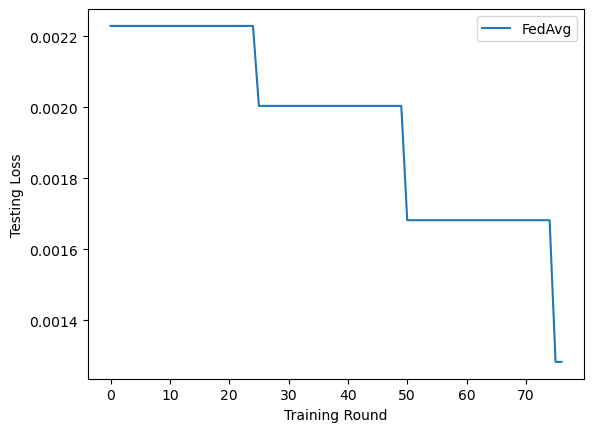

In [6]:
plt.plot(range(len(seq_prev_test_loss)), seq_prev_test_loss, label="FedAvg")
#plt.plot(range(len(local_val_test_loss)), local_val_test_loss, label="Local")
#plt.title("Averaged Test Loss: Vanilla Main Run")
plt.xlabel("Training Round")
plt.ylabel("Testing Loss")
plt.legend()
plt.show()